In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
from pathlib import Path
import torch
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from dataloader import FaceKeypointsDataset
from data_augment import part2_augment
from learn import train, test
import cnn
from display import show_keypoints

In [156]:
ROOT_DIR = Path("imm_face_db")

# Initialite Datasets

transform = part2_augment
# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = FaceKeypointsDataset(
    idxs=np.arange(33), root_dir=ROOT_DIR, transform=transform
)
assert len(training_set) == 192

# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = FaceKeypointsDataset(
    idxs=np.arange(32, 40), root_dir=ROOT_DIR, transform=transform
)
assert len(validation_set) == 48

# Initialize Dataloaders
batch_size = 16
train_loader = DataLoader(training_set, batch_size, shuffle=True)
test_loader = DataLoader(validation_set, batch_size, shuffle=False)

-7
[411.46774 290.80576]
[372.96042 338.78345]
torch.Size([1, 480, 640]) torch.Size([58, 2])


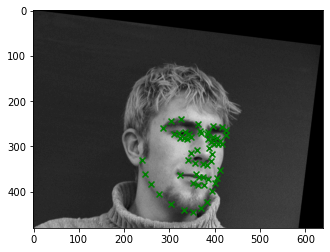

In [209]:
# Plotting a few input images and their face keypoints.
sample = training_set[3]
image, points = sample
show_keypoints(image, points)

In [67]:
# Training and Testing

epochs = 20
learn_rate = 0.001
show_every = 3
loss_per_epoch = []
for ep in range(epochs):
    print(f"========== Epoch {ep} ==========")
    trained_model, train_loss = train(
        train_loader, cnn.Face(), learn_rate
    )
    _, valid_loss = test(test_loader, trained_model, show_every)
    
    print_epoch(ep, train_loss, valid_loss)
    loss_per_epoch.append([train_loss, valid_loss])

========== Epoch 0 ==========


AttributeError: module 'cnn' has no attribute 'Face'

In [ ]:
test(test_loader, trained_model)

In [64]:
rot_deg = 30
theta = np.radians(rot_deg)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

a = np.array(([1, 2,], [0, 0], [-1, -2]))
ra = (R @ a.T).T
ra

array([[-0.1339746 ,  2.23205081],
       [ 0.        ,  0.        ],
       [ 0.1339746 , -2.23205081]])

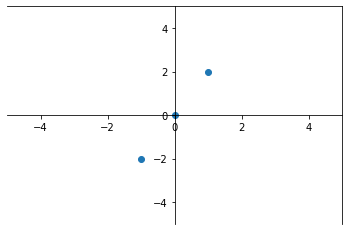

In [65]:
ax = plt.gca()
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

# set the x-spine
ax.spines['left'].set_position('zero')
# set the y-spine
ax.spines['bottom'].set_position('zero')
plt.scatter(a[:,0], a[:, 1])


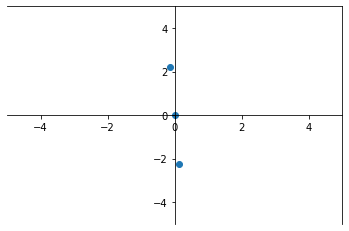

In [66]:
ax = plt.gca()
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

# set the x-spine
ax.spines['left'].set_position('zero')
# set the y-spine
ax.spines['bottom'].set_position('zero')
plt.scatter(ra[:,0], ra[:, 1])